This notebook is for when you have used envs_plotter to plot individual simulation statistics for various loads, and now wish to do some **plots across multiple simulation statistics for cross-simulation analysis**. Note that this notebook requires you having set a path_to_save string when calling envs_plotter so that an envs_plotter_<sim_name> directory contains a summary_dataframe.pkl file (summary_dataframe.pkl files are generated via the EnvsPlotter construct_tables() method).

In [1]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

In [2]:
%autoreload

# str paths to summary dataframe pickles. Use {param: path}
base_path = '/rdata/ong/trafpy/management/flowcentric/'
summary_dataframe_paths = {}

# N.B. Will save data across sims in dir of last element of sims list below (e.g. if 0.8 is last, save in rack_dist_sensitivity_0.8)
version = '_mean'
control_var_name='% Intra-Rack'
sims = [0.2, 0.4, 0.6, 0.8] # rack_dist_sensitivity
# control_var_name='% Hot Nodes'
# sims = [0.05, 0.1, 0.2, 0.4] # skewed_nodes_sensitivity

for sim in sims:
    folder = 'rack_dist_sensitivity_{}_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data{}'.format(sim, version)
#     path = base_path+folder+'/envs_plotter_'+folder+'/summary_dataframe.pkl'
#     path = base_path+folder+'/mean_summary_dataframe.pkl'
    path = base_path+folder
    summary_dataframe_paths[sim] = path
print(summary_dataframe_paths)

{0.2: '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean', 0.4: '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean', 0.6: '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean', 0.8: '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean'}


In [3]:
%autoreload
import pandas as pd

# load dataframes and convert to dicts
summary_dicts = {}
for sim in summary_dataframe_paths.keys():
    summary_dicts[sim] = pd.read_pickle(summary_dataframe_paths[sim]+'/mean_summary_dataframe.pkl').to_dict()
print(summary_dicts.keys())
print(summary_dicts[list(summary_dicts.keys())[0]].keys())

dict_keys([0.2, 0.4, 0.6, 0.8])
dict_keys(['Load', 'Subject', 'T-Score', 'Mean FCT (μs)', 'p99 FCT (μs)', 'Max FCT (μs)', 'Throughput', 'Throughput (B/μs)', 'Frac Flows Accepted', 'Frac Info Accepted'])


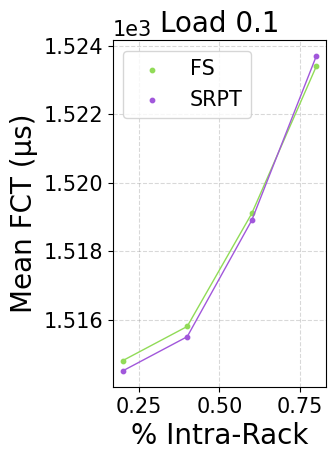

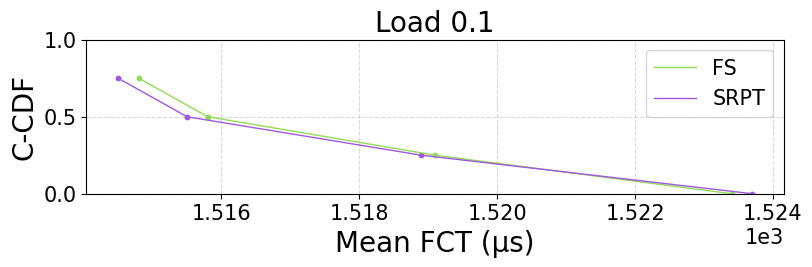

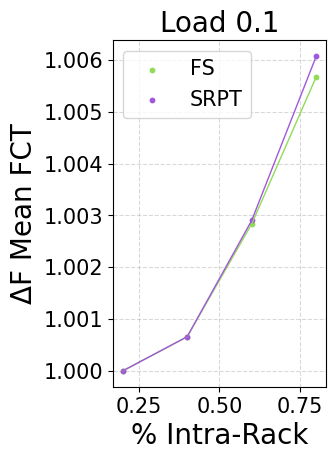

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


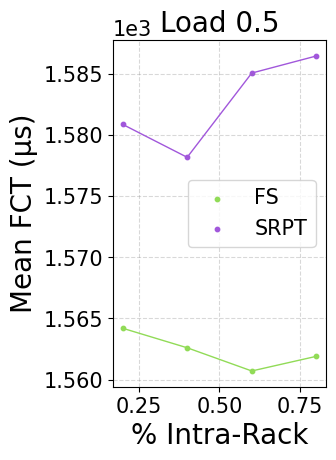

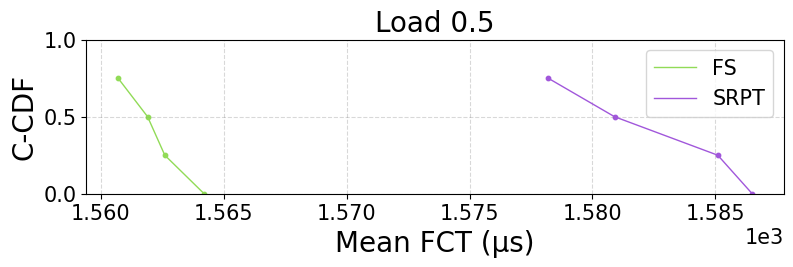

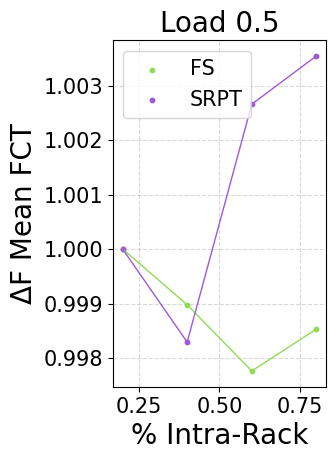

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


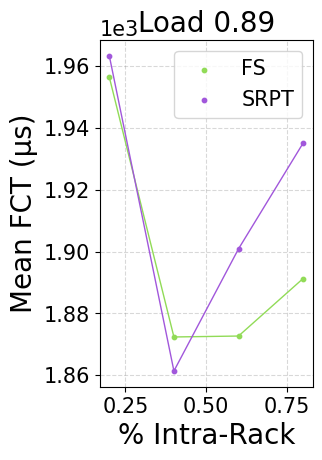

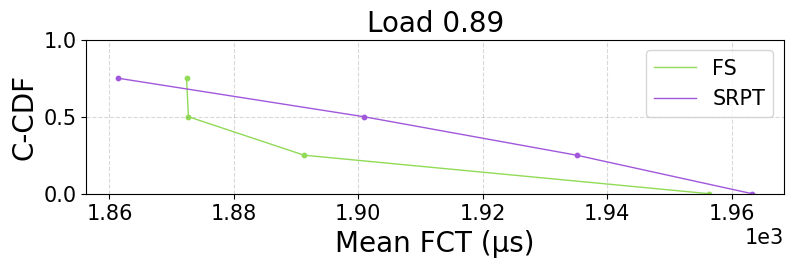

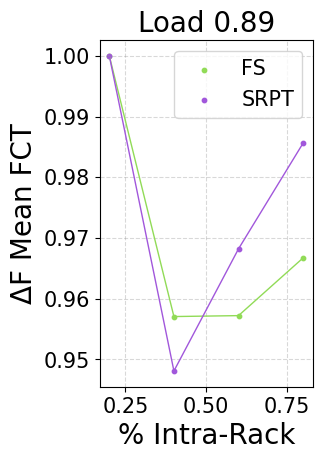

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


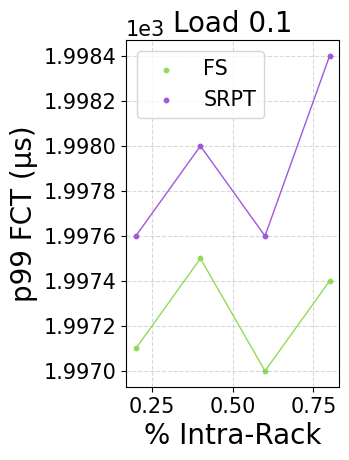

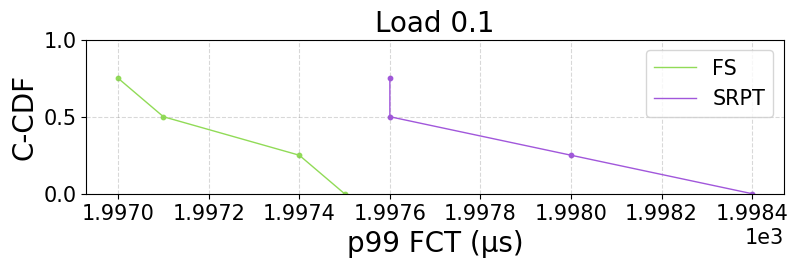

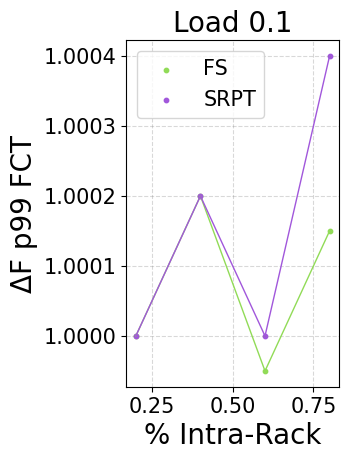

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


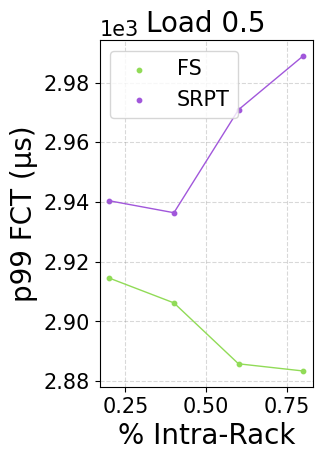

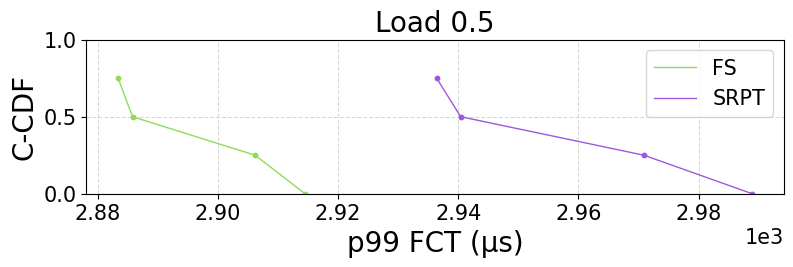

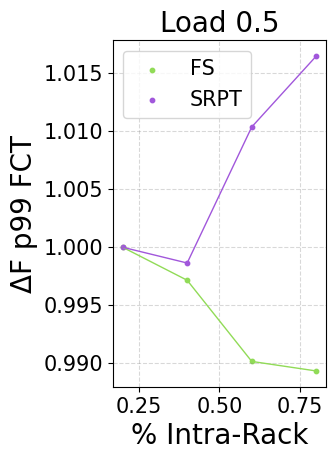

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


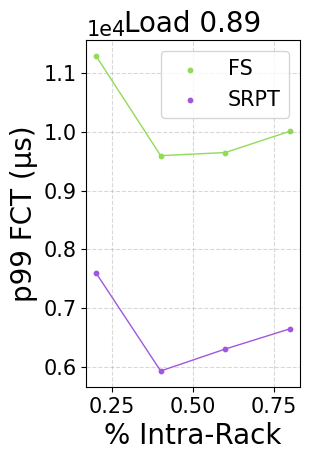

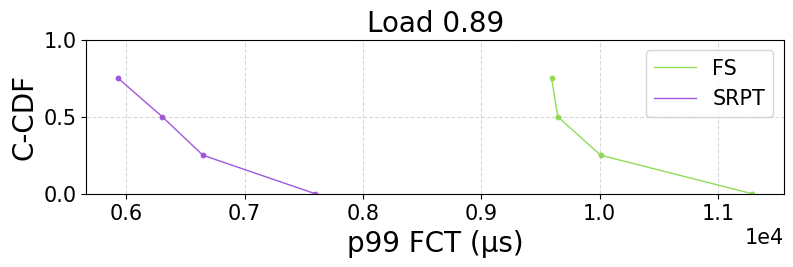

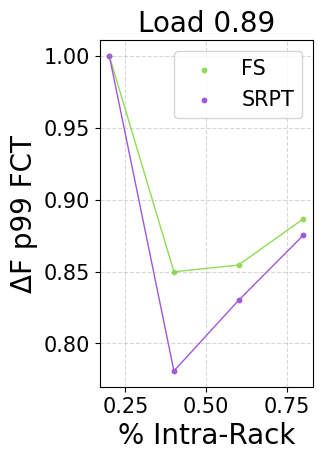

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


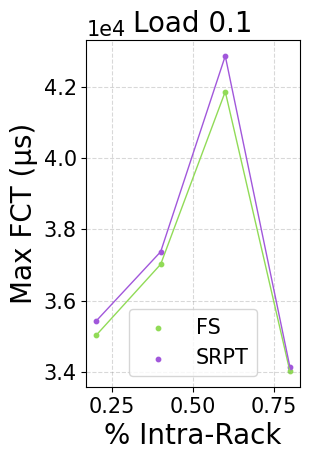

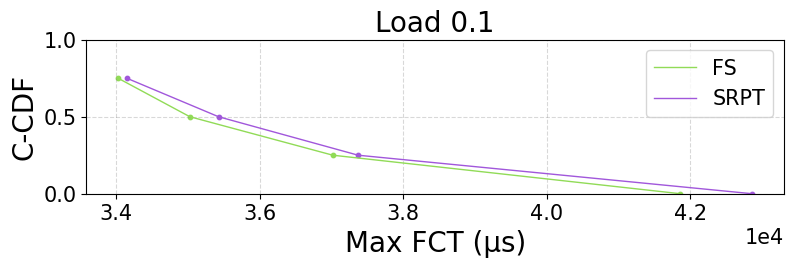

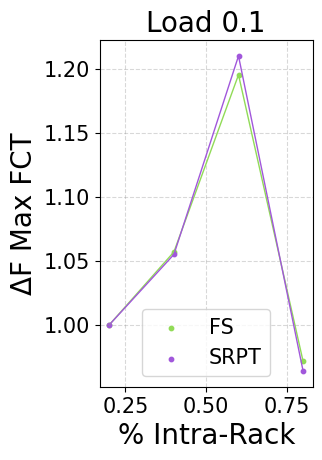

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


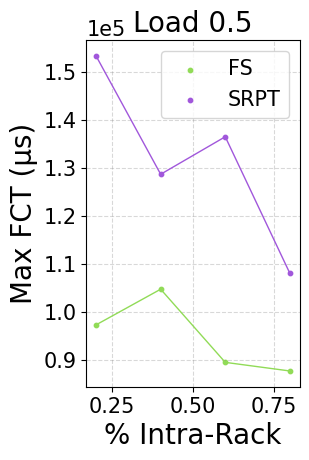

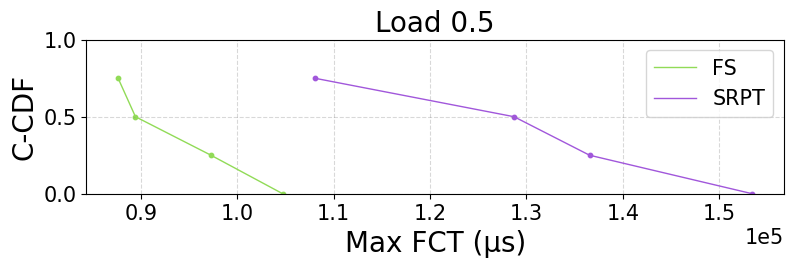

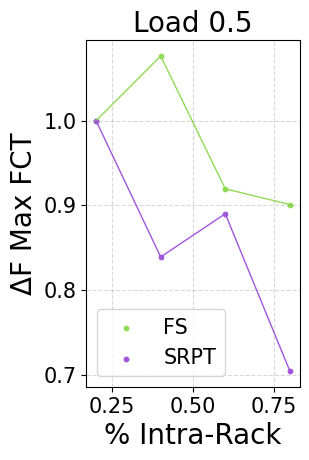

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


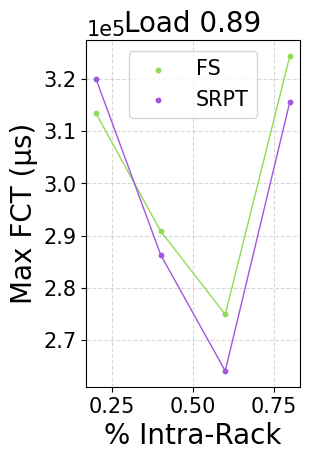

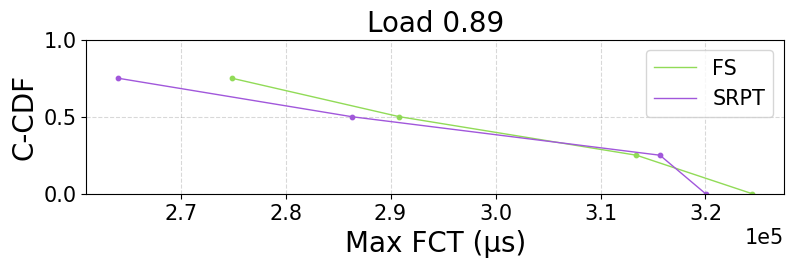

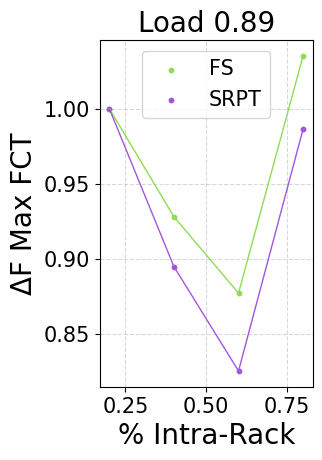

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


In [6]:
%autoreload
import numpy as np
from trafpy.manager import plot_summary_dict_params




# FLOW COMPLETION METRICS

subjects_to_plot=['SRPT', 'FS']
# subjects_to_plot='all'
loads=[0.1, 0.5, 0.9]
font_size=20
# cdf_figsize=(6,2)
cdf_figsize=(9,2)
scatter_figsize=(2.75,4.5)
time_units = '\u03BCs'
info_units = 'B'





figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Mean FCT', # for finding in summary dict
                              dependent_var_display_name = 'Mean FCT ({})'.format(time_units),
                              control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=True,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='p99 FCT',
                                dependent_var_display_name = 'p99 FCT ({})'.format(time_units),
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=True,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Max FCT',
                                dependent_var_display_name = 'Max FCT ({})'.format(time_units),
                              control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                              use_scientific_notation=True,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])

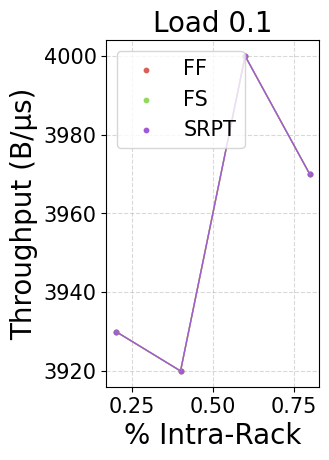

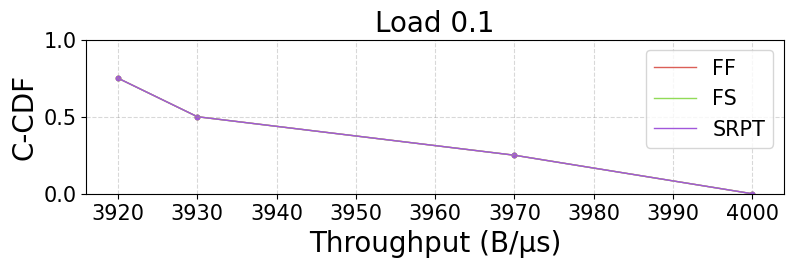

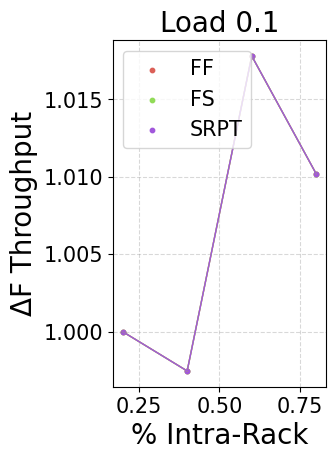

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


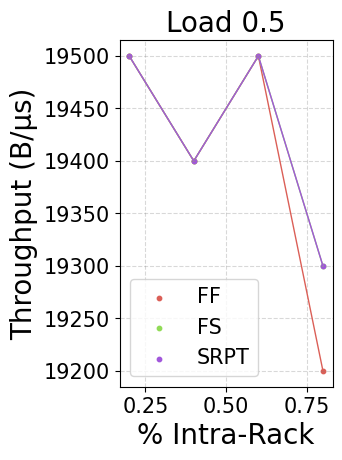

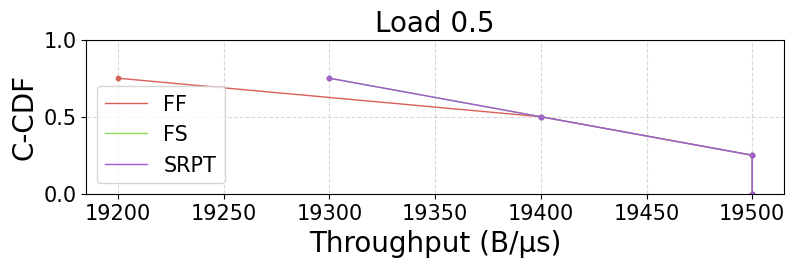

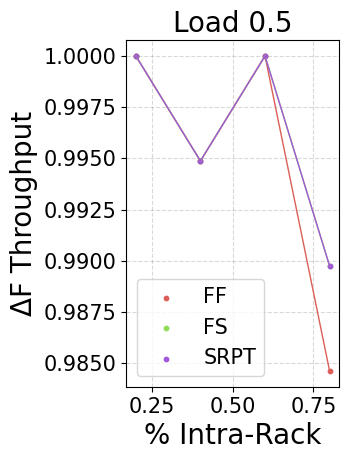

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


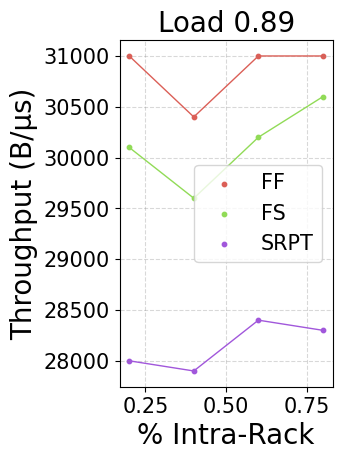

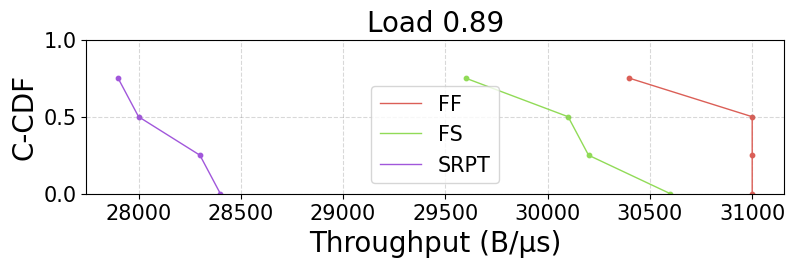

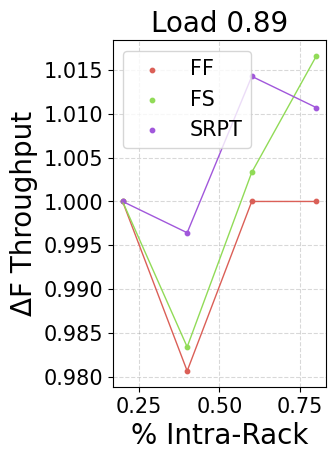

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


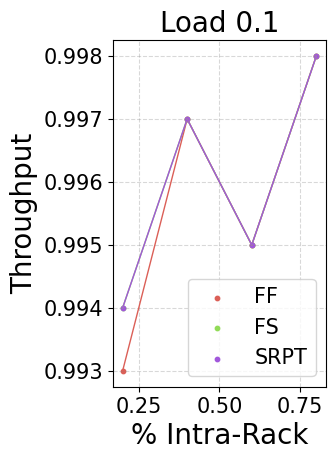

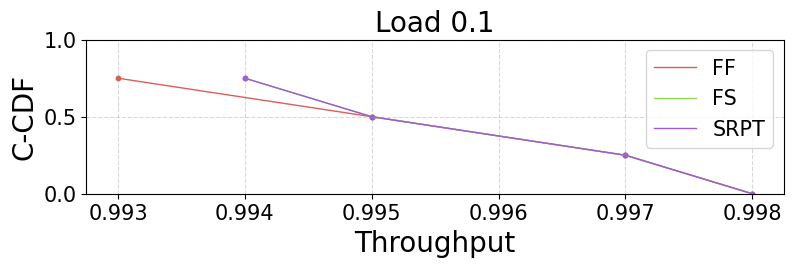

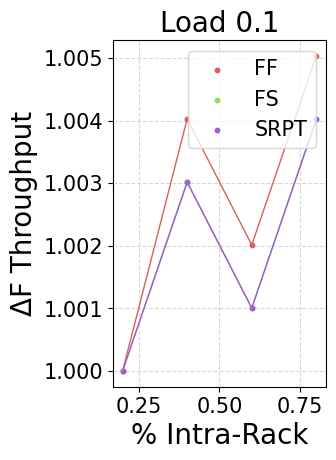

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


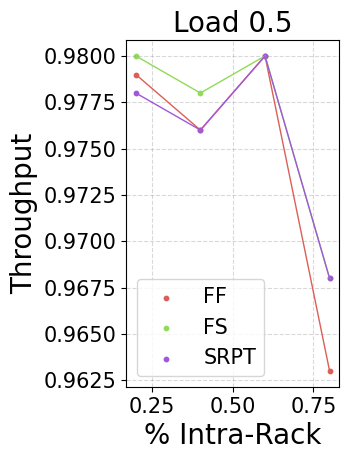

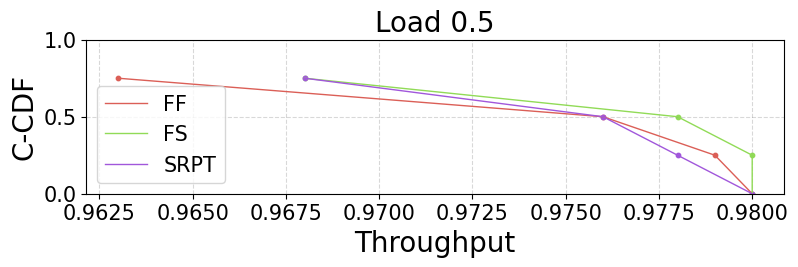

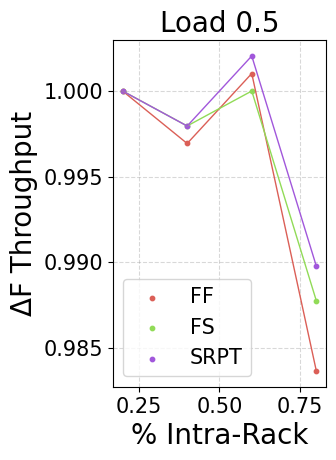

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


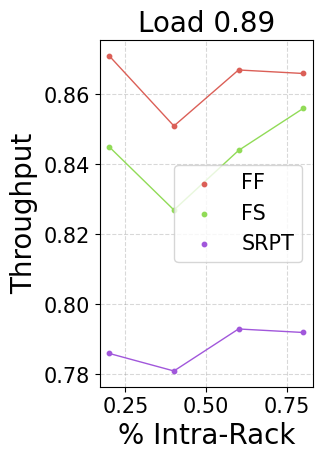

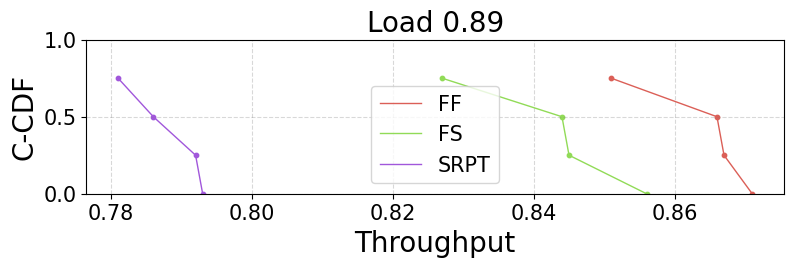

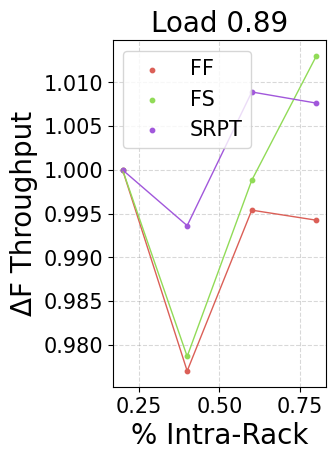

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


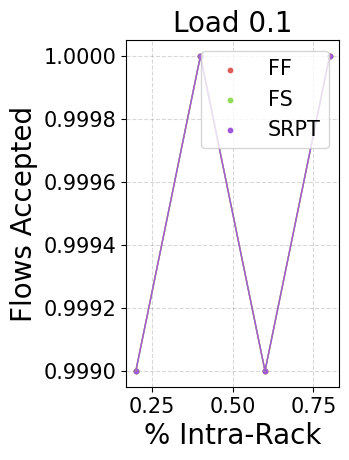

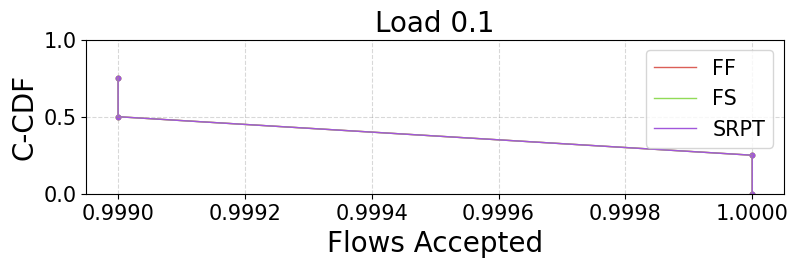

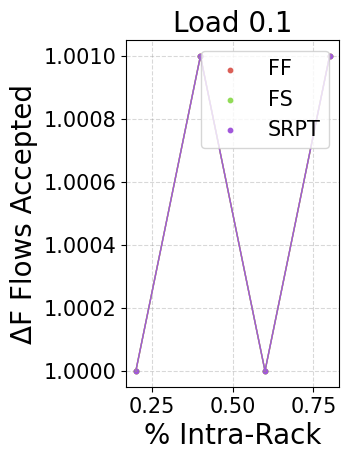

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


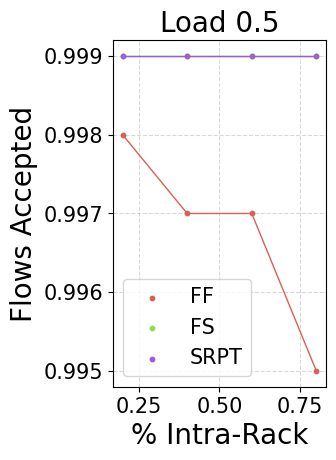

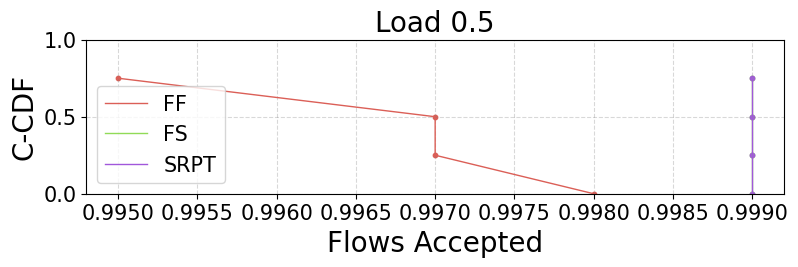

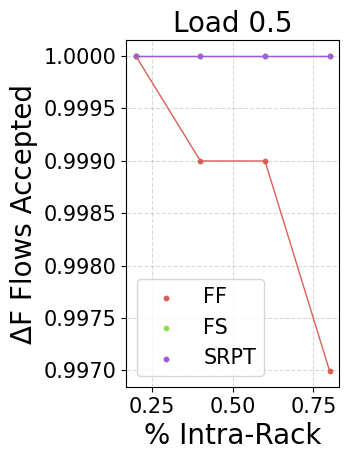

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


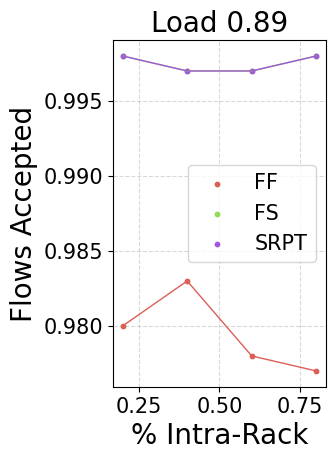

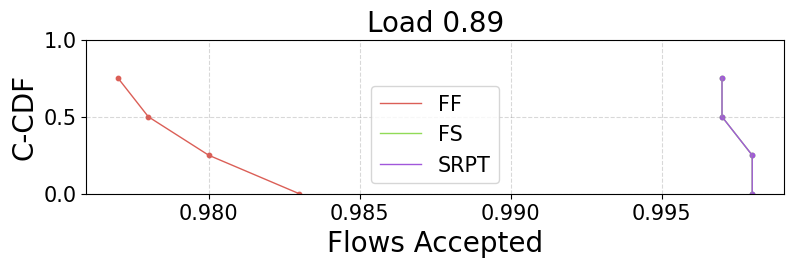

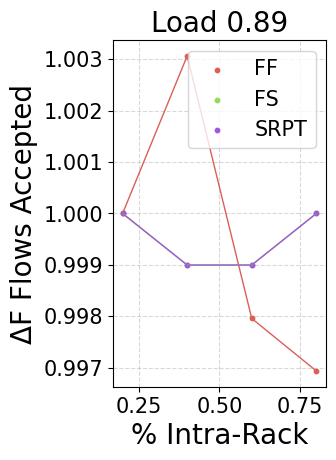

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


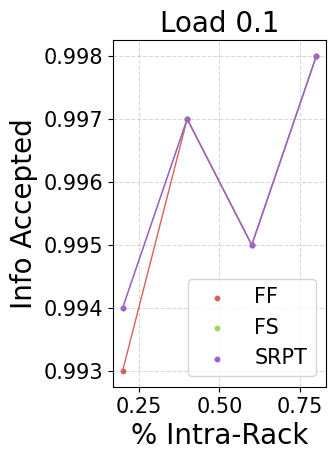

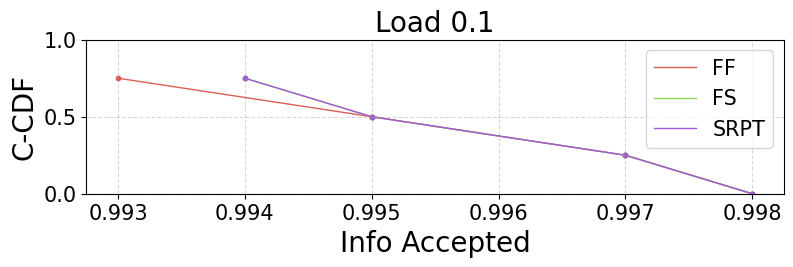

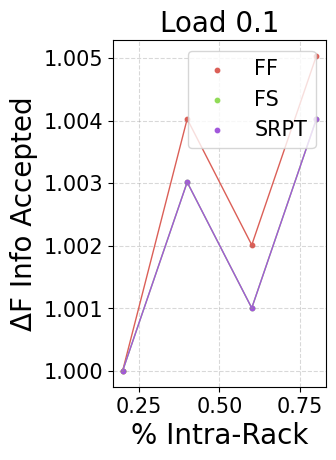

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


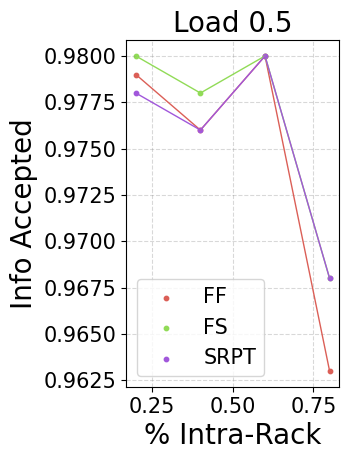

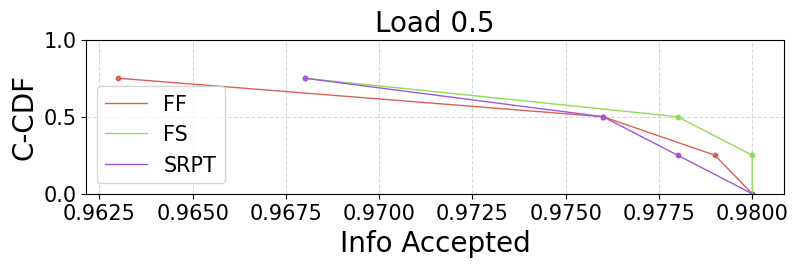

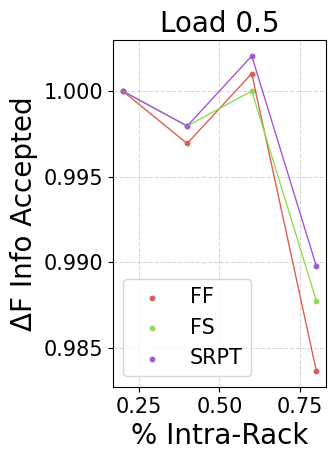

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


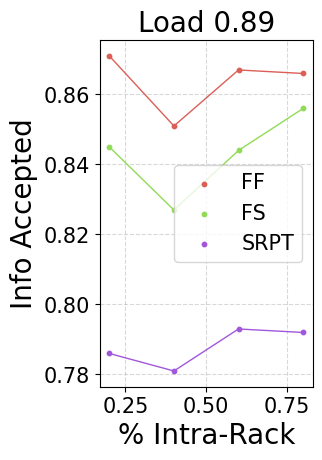

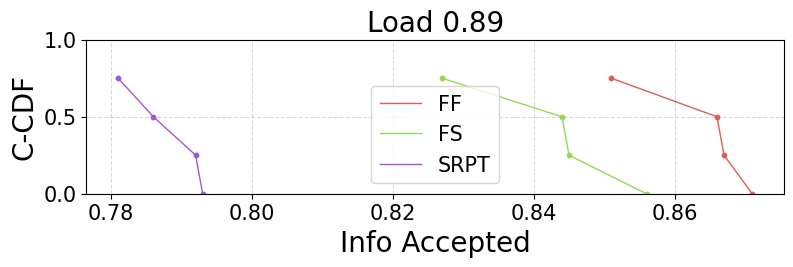

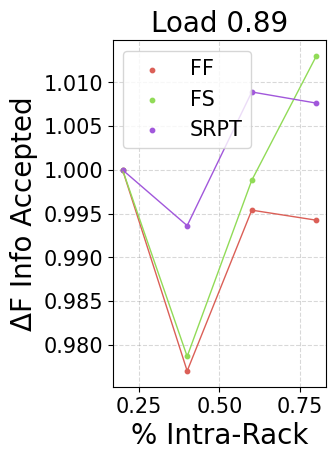

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


In [7]:
%autoreload
import numpy as np
from trafpy.manager import plot_summary_dict_params




# THROUGHPUT & DEMANDS ACCEPTED METRICS

subjects_to_plot=['SRPT', 'FS', 'FF']
# subjects_to_plot='all'
loads=[0.1, 0.5, 0.9]
font_size=20
# cdf_figsize=(6,2)
cdf_figsize=(9,2)
scatter_figsize=(2.75,4.5)
time_units = '\u03BCs'
info_units = 'B'




figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Throughput (', # for finding in summary dict
                              dependent_var_display_name='Throughput ({}/{})'.format(info_units, time_units),
                              replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])



figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Throughput', # for finding in summary dict
                              dependent_var_display_name='Throughput',
                              replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Flows Accepted', 
                              dependent_var_display_name='Flows Accepted',
                                replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Info Accepted', 
                                dependent_var_display_name='Info Accepted',
                              replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                              use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=summary_dataframe_paths[sim])